In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [2]:
rv9 = np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

In [3]:
#sns.set()

In [4]:
Rac = []; RinAc = []

for i in range(10):
    if i>8:
        rac = pd.read_csv('data/bmAc_R'+str(i+1)+'_213.csv',names=['bm'])
        rinac = pd.read_csv('data/bminAc_R'+str(i+1)+'_213.csv',names=['bm'])
    else:
        rac = pd.read_csv('data/bmAc_R'+'0'+str(i+1)+'_213.csv',names=['bm'])
        rinac = pd.read_csv('data/bminAc_R'+'0'+str(i+1)+'_213.csv',names=['bm'])
    Rac.append(rac)
    RinAc.append(rinac)
#Rac = np.array(Rac)
#RinAc = np.array(RinAc)

In [5]:
Rac113 = []; RinAc113 = []

for i in range(10):
    if i>8:
        rac113 = pd.read_csv('data/bmAc_R'+str(i+1)+'_113.csv',names=['bm'])
        rinac113 = pd.read_csv('data/bminAc_R'+str(i+1)+'_113.csv',names=['bm'])
    else:
        rac113 = pd.read_csv('data/bmAc_R'+'0'+str(i+1)+'_113.csv',names=['bm'])
        rinac113 = pd.read_csv('data/bminAc_R'+'0'+str(i+1)+'_113.csv',names=['bm'])
    Rac113.append(rac113)
    RinAc113.append(rinac113)

In [6]:
mu01 = Rac[0]['bm'].mean()
sigma01 = np.std(Rac[0]['bm'])

In [7]:
mu01,sigma01

(7.1437125748503, 2.1489693461564596)

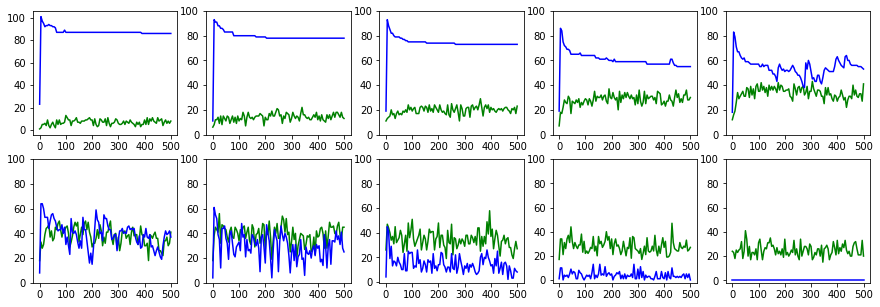

In [8]:
f = plt.figure(figsize=(15,5))
for i in range(10):
    f.add_subplot(2,5,i+1)
    plt.plot(Rac[i]['bm'].T[0::5], color='green')
    plt.plot(RinAc[i]['bm'].T[0::5], color='blue')
    plt.xticks(np.arange(0,501,100))
    plt.yticks(np.arange(0,110,20))

/home/nitta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


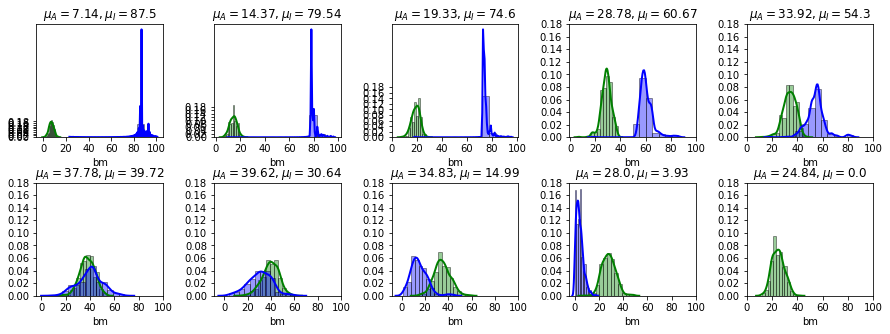

In [9]:
#mu01 = Rac[0]['bm'].mean()
#sigma01 = np.std(Rac[0]['bm'])
mus_a = []; mus_i = []
for i in range(10):
    mu_a = Rac[i]['bm'].mean()
    mu_i = RinAc[i]['bm'].mean()
    mus_a.append(mu_a)
    mus_i.append(mu_i)
    
f = plt.figure(figsize=(15,5))

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

for i in range(10):
    f.add_subplot(2,5,i+1)
    if i<9:
        sns.distplot(Rac[i]['bm'].T, hist=True, kde=True, bins=13, color = 'green', hist_kws={'edgecolor':'black'},\
                kde_kws={'linewidth':2})
        sns.distplot(RinAc[i]['bm'].T, hist=True, kde=True, bins=13, color = 'blue', hist_kws={'edgecolor':'black'},\
                kde_kws={'linewidth':2})
    else:
        sns.distplot(Rac[i]['bm'].T, hist=True, kde=True, bins=13, color = 'green', hist_kws={'edgecolor':'black'},\
                kde_kws={'linewidth':2})
    plt.title('$\mu_A = $'+str(np.round(mus_a[i],2))+'$,\mu_I = $'+str(np.round(mus_i[i],2)))
    plt.xticks(np.arange(0,101,20))
    plt.yticks(np.arange(0.0,0.2,0.02))

In [7]:
avM = pd.read_csv('data/v9mtrs_std213s5F9.2pN.csv', names=['spec1','dev1','spec2','dev2'])
avM113 = pd.read_csv('data/v9mtrs_std113s5F9.2pN.csv', names=['spec1','dev1','spec2','dev2'])

<ErrorbarContainer object of 3 artists>

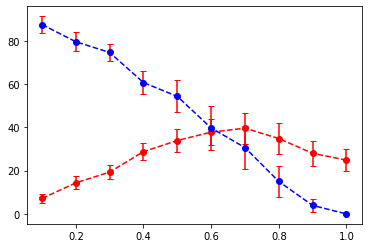

In [11]:
plt.errorbar(rv9,avM['spec1'],avM['dev1'], capsize=3, linestyle='--', color='red', marker='o', ecolor='red', label='Active motors')
plt.errorbar(rv9,avM['spec2'],avM['dev2'], capsize=3, linestyle='--', color='blue', marker='o', ecolor='red', label='Active motors')

## Filament 2

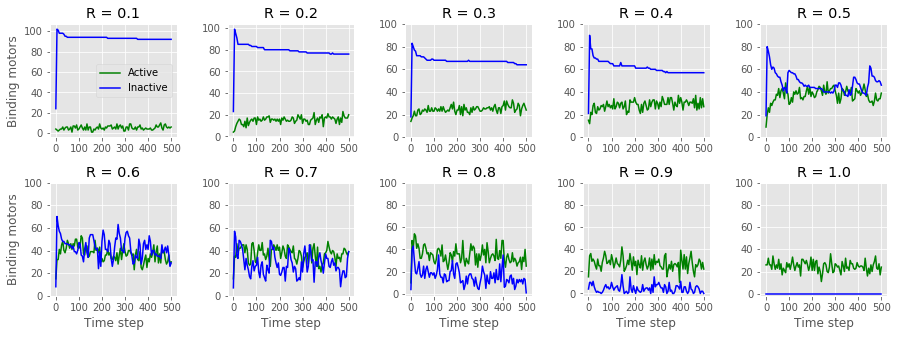

In [12]:
f = plt.figure(figsize=(15,5))
#plt.style.use('ggplot') # like R figures *

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

for i in range(10):
    f.add_subplot(2,5,i+1)
    plt.plot(Rac113[i]['bm'].T[0::5], color='green', label='Active')
    plt.plot(RinAc113[i]['bm'].T[0::5], color='blue', label='Inactive')
    plt.xticks(np.arange(0,501,100))
    plt.yticks(np.arange(0,110,20))
    if i<9:
        plt.title('R = 0.'+str(i+1))
    else:
        plt.title('R = 1.0')
    if i>4:
        plt.xlabel('Time step')
    if i==0 or i == 5:
        plt.ylabel('Binding motors')
    if i==0:
        plt.legend()
        
#plt.savefig('fig/BindingMotors.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/BindingMotors.png', fmt='png', dip='1200', bbox_inches='tight')
plt.show()

/home/nitta/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


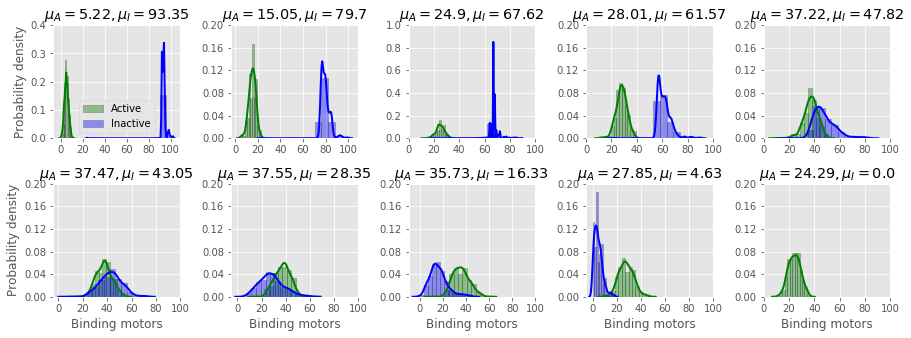

In [13]:
#mu01 = Rac[0]['bm'].mean()
#sigma01 = np.std(Rac[0]['bm'])
mus_a = []; mus_i = []
for i in range(10):
    mu_a = Rac113[i]['bm'].mean()
    mu_i = RinAc113[i]['bm'].mean()
    mus_a.append(mu_a)
    mus_i.append(mu_i)


f = plt.figure(figsize=(15,5))
#plt.style.use('ggplot') # like R figures *

plt.subplots_adjust(wspace=0.4)
plt.subplots_adjust(hspace=0.4)

for i in range(10):
    f.add_subplot(2,5,i+1)
    if i<9:
        sns.distplot(Rac113[i].T, hist=True, kde=True, bins=13, color = 'green', hist_kws={'edgecolor':'black'},\
                kde_kws={'linewidth':2}, label='Active')
        sns.distplot(RinAc113[i].T, hist=True, kde=True, bins=13, color = 'blue', hist_kws={'edgecolor':'black'},\
                kde_kws={'linewidth':2}, label='Inactive')
    else:
        sns.distplot(Rac113[i].T, hist=True, kde=True, bins=13, color = 'green', hist_kws={'edgecolor':'black'},\
                kde_kws={'linewidth':2})
    plt.title('$\mu_A = $'+str(np.round(mus_a[i],2))+'$,\mu_I = $'+str(np.round(mus_i[i],2)))
    if i==0:
        plt.xticks(np.arange(0,101,20))
        plt.yticks(np.arange(0.0,0.5,0.1))
        plt.legend()
    elif i==2:
        plt.xticks(np.arange(0,101,20))
        plt.yticks(np.arange(0.0,1.2,0.2))
    else:
        plt.xticks(np.arange(0,101,20))
        plt.yticks(np.arange(0.0,0.21,0.04))
    #if i<9:
        #plt.xlabel('Motors, R = 0.'+str(i+1))
    #else:
        #plt.xlabel('Motors, R = 1.0')
    if i>4:
        plt.xlabel('Binding motors')
    if i==0 or i == 5:
        plt.ylabel('Probability density')
        
#plt.savefig('fig/BindingMotorsHist.svg', fmt='svg', dip='1000', bbox_inches='tight')
#plt.savefig('fig/BindingMotorsHist.png', fmt='png', dip='1000', bbox_inches='tight')
plt.show()

<ErrorbarContainer object of 3 artists>

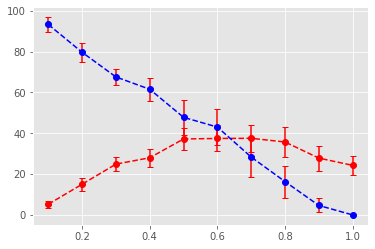

In [14]:
plt.errorbar(rv9,avM113['spec1'],avM113['dev1'], capsize=3, linestyle='--', color='red', marker='o', ecolor='red', label='Active motors')
plt.errorbar(rv9,avM113['spec2'],avM113['dev2'], capsize=3, linestyle='--', color='blue', marker='o', ecolor='red', label='Active motors')

## Filament 1 and 2

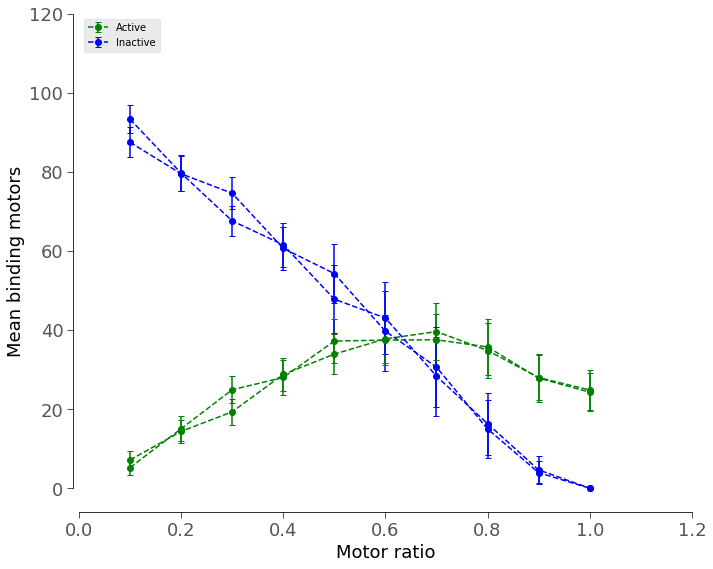

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
#plt.style.use('ggplot') # like R figures *

ax.errorbar(rv9,avM['spec1'],avM['dev1'], capsize=3, linestyle='--', color='green', marker='o', ecolor='green', label='Active')
ax.errorbar(rv9,avM['spec2'],avM['dev2'], capsize=3, linestyle='--', color='blue', marker='o', ecolor='blue', label='Inactive')

ax.errorbar(rv9,avM113['spec1'],avM113['dev1'], capsize=3, linestyle='--', color='green', marker='o', ecolor='green')
ax.errorbar(rv9,avM113['spec2'],avM113['dev2'], capsize=3, linestyle='--', color='blue', marker='o', ecolor='blue')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.01))
ax.spines['left'].set_bounds(0,120)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0,1.21,step=0.2))
ax.set_yticks(np.arange(0,121,20))
#ax.set_ylim(ymin=0)

ax.tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.set_xlabel('Motor ratio', fontsize=18)
ax.set_ylabel('Mean binding motors', fontsize=18)
ax.legend(loc='upper left')

fig.tight_layout()
#plt.savefig('fig/MeanBindingMotorChanges.svg', fmt='svg', dip='1200', bbox_inches='tight')
#plt.savefig('fig/MeanBindingMotorChanges.png', fmt='png', dip='1200', bbox_inches='tight')
plt.show()